## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [50]:
def sample_cards(N, n, k, replace = False):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=replace)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [51]:
cards = sample_cards(100, 6, 3)
np.concatenate([cards[0], cards[1]])

array([ 9, 41, 96,  5, 10, 92])

and access the cards of each player with 

In [52]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([ 9, 41, 96]), array([ 5, 10, 92]))

The lowest card in the game is

In [53]:
np.min(cards)

5

In [54]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

(array([1.8003e-01, 1.4870e-01, 1.2342e-01, 9.9970e-02, 8.3610e-02,
        6.9720e-02, 5.6640e-02, 4.5860e-02, 3.7160e-02, 3.0160e-02,
        2.5010e-02, 1.9860e-02, 1.6180e-02, 1.3360e-02, 1.0990e-02,
        8.1900e-03, 6.5700e-03, 5.2000e-03, 4.2200e-03, 3.4800e-03,
        2.5100e-03, 1.9400e-03, 1.5900e-03, 1.3100e-03, 8.3000e-04,
        7.5000e-04, 8.2000e-04, 4.3000e-04, 2.8000e-04, 3.2000e-04,
        1.9000e-04, 1.9000e-04, 1.4000e-04, 9.0000e-05, 1.1000e-04,
        5.0000e-05, 2.0000e-05, 3.0000e-05, 2.0000e-05, 0.0000e+00,
        2.0000e-05, 0.0000e+00, 2.0000e-05, 0.0000e+00, 0.0000e+00,
        1.0000e-05, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

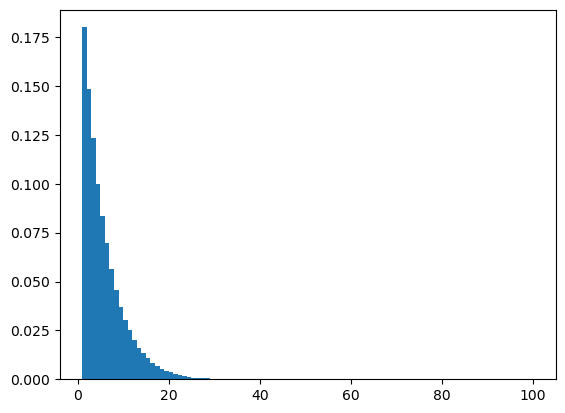

In [55]:
def gen_lowest(N,n,k):
    cards = sample_cards(N,n,k)
    return np.min(cards)

num_samp = 100000

lowest_nums = np.zeros(num_samp)
for i in range(num_samp):
    lowest_nums[i] = int(gen_lowest(100,6,3))

plt.hist(lowest_nums, bins = np.arange(1, 101), density = True)
    

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e-05, 2.2000e-04, 1.4300e-03, 6.5300e-03, 1.8720e-02,
        4.2010e-02, 6.7480e-02, 8.9850e-02, 1.0091e-01, 1.0285e-01,
        9.9190e-02, 8.7460e-02, 7.6310e-02, 6.2850e-02, 5.1740e-02,
        4.3010e-02, 3.3250e-02, 2.6270e-02, 2.0910e-02, 1.6300e-02,
        1.2320e-02, 1.0030e-02, 7.1700e-03, 5.8000e-03, 4.5700e-03,
        3.5600e-03, 2.4700e-03, 1.6300e-03, 1.3500e-03, 1.0800e-03,
        7.4000e-04, 4.7000e-04, 4.0000e-04, 3.2000e-04, 2.0000e-04,
        1.9000e-04, 1.5000e-04, 8.0000e-05, 5.0000e-05, 3.0000e-05,
        2.0000e-05, 2.0000e-05, 1.0000e-05, 0.0000e+00, 1.0000e-05,
        1.0000e-05, 1.0000e-05, 0.0000e+00, 1.0000e-05, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

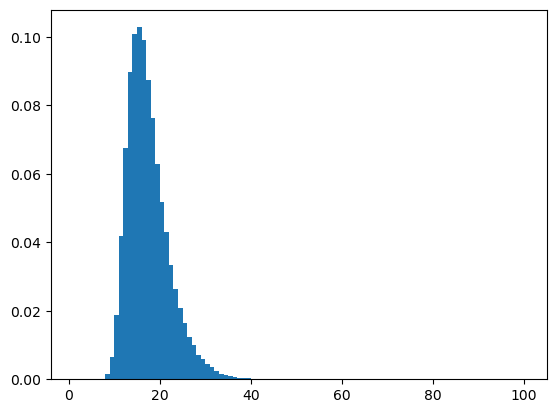

In [56]:
def gen_largest_gap_all(N, n, k):
    cards = sample_cards(N,n,k)
    flat_cards = np.ndarray.flatten(cards)
    sorted_cards = np.sort(flat_cards)
    largest_gap = 0
    for i in range(n*k - 1):
        curr_gap = sorted_cards[i+1] - sorted_cards[i]
        if curr_gap > largest_gap:
            largest_gap = curr_gap
    return largest_gap

num_samp = 100000

largest_gaps = np.zeros(num_samp)
for i in range(num_samp):
    largest_gaps[i] = int(gen_largest_gap_all(100,6,3))

plt.hist(largest_gaps, bins = np.arange(1, 101), density = True)

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e-04, 4.000e-04,
        2.200e-03, 7.000e-03, 1.730e-02, 3.530e-02, 5.550e-02, 7.350e-02,
        9.720e-02, 9.780e-02, 1.017e-01, 9.070e-02, 8.270e-02, 6.780e-02,
        5.350e-02, 4.810e-02, 3.840e-02, 3.010e-02, 2.260e-02, 1.800e-02,
        1.820e-02, 9.600e-03, 9.600e-03, 5.700e-03, 4.400e-03, 2.300e-03,
        2.700e-03, 2.300e-03, 1.500e-03, 8.000e-04, 4.000e-04, 4.000e-04,
        7.000e-04, 5.000e-04, 4.000e-04, 3.000e-04, 1.000e-04, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e-04, 1.000e-04, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

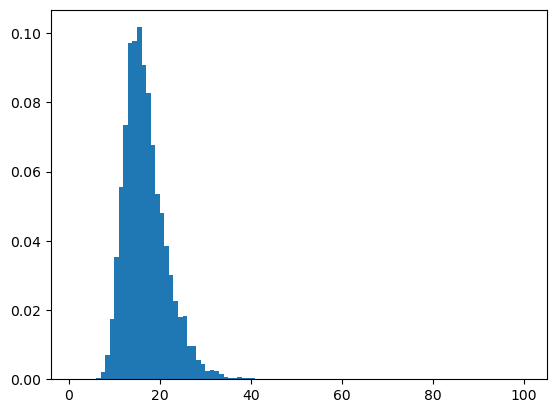

In [57]:
def two_player_largest_gap(p_one, p_two, all_sorted_cards):
    flat_cards = np.concatenate([p_one, p_two])
    sorted_cards = np.sort(flat_cards)
    largest_gap = 0
    for i in range(len(sorted_cards) - 1):
        card_2 = sorted_cards[i+1]
        card_1 = sorted_cards[i]
        curr_gap = card_2 - card_1
        #print(abs(np.where(all_sorted_cards == card_1)[0][0] - np.where(all_sorted_cards == card_2)[0][0]))
        if abs(np.where(all_sorted_cards == card_1)[0][0] - np.where(all_sorted_cards == card_2)[0][0]) == 1:
            if curr_gap > largest_gap:
                if np.any(p_one == card_1):
                    if np.any(p_two == card_2):
                        largest_gap = curr_gap
                elif np.any(p_one == card_2):
                    if np.any(p_two == card_1):
                        largest_gap = curr_gap
    return largest_gap

def gen_largest_gap_diff(N, n, k):
    cards = sample_cards(N,n,k)
    flat_cards = np.ndarray.flatten(cards)
    sorted_cards = np.sort(flat_cards)
    largest_gap = 0
    for i in range(n):
        curr_player = cards[i]
        for j in range(n):
            if i != j:
                other_player = cards[j]
                curr_gap = two_player_largest_gap(curr_player, other_player, sorted_cards)
                if curr_gap > largest_gap:
                    largest_gap = curr_gap
    return largest_gap

num_samp = 10000

largest_gaps_diff = np.zeros(num_samp)
for i in range(num_samp):
    largest_gaps_diff[i] = int(gen_largest_gap_diff(100,6,3))

plt.hist(largest_gaps_diff, bins = np.arange(1, 101), density = True)

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

__Visually, these two distributions appear very similar. At K = 6 and n = 3 they appear to have a mean centered around 18 with an equal spread__

__First, I will keep the number of cards per player stable (k = 3) and observe how the difference in the mean changes between the largest gap among all players vs. just different players as n increases from 2 to 20.__

In [58]:
def compare_dist(k,n,num_samp):
    
    largest_gaps = np.zeros(num_samp)
    for i in range(num_samp):
        largest_gaps[i] = int(gen_largest_gap_all(100,n,k))
    
    largest_gaps_diff = np.zeros(num_samp)
    for i in range(num_samp):
        largest_gaps_diff[i] = int(gen_largest_gap_diff(100,n,k))
        
    return np.mean(largest_gaps) - np.mean(largest_gaps_diff)

n_vals = np.arange(2, 21)
mean_diffs = np.zeros(len(n_vals))

for i in n_vals:
    mean_diff = compare_dist(3,i,1000)
    mean_diffs[i - 2] = mean_diff


([<matplotlib.axis.XTick at 0x7f92f499bac0>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

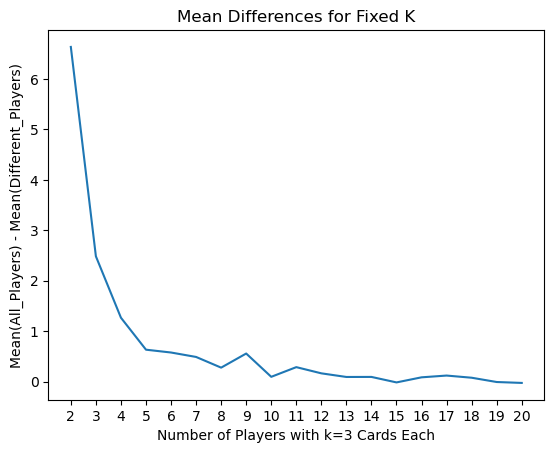

In [59]:
plt.plot(n_vals, mean_diffs)
plt.ylabel('Mean(All_Players) - Mean(Different_Players)')
plt.xlabel('Number of Players with k=3 Cards Each')
plt.title("Mean Differences for Fixed K")
plt.xticks(n_vals)

__Second I will keep the number of players at 6 and look at how how the difference in the mean changes between the largest gap among all players vs. just different players relative to a change in k from 2 to 15__

In [60]:
k_vals = np.arange(2, 16)
mean_diffs_k = np.zeros(len(k_vals))

for i in k_vals:
    mean_diff = compare_dist(i,6,1000)
    mean_diffs_k[i - 2] = mean_diff

([<matplotlib.axis.XTick at 0x7f92f4945c70>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15')])

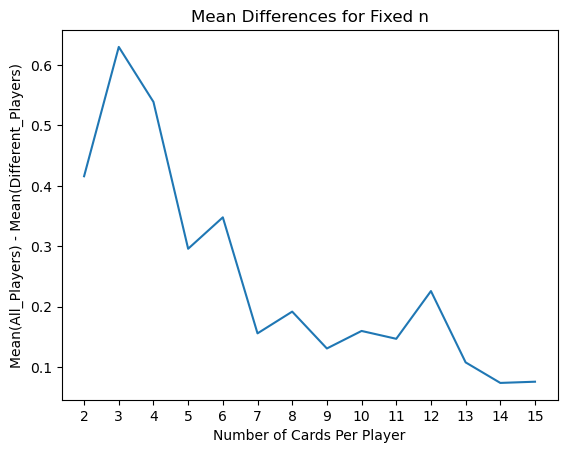

In [61]:
plt.plot(k_vals, mean_diffs_k)
plt.ylabel('Mean(All_Players) - Mean(Different_Players)')
plt.xlabel('Number of Cards Per Player')
plt.title("Mean Differences for Fixed n")
plt.xticks(k_vals)

__The difference in average gap size seems to monotonally decrease as n increase. This makes sense because with a fixed k, the proportion of cards that are held by a given player is much smaller relative to the number of cards in play. This means the likelihood of the largest gap being comprised of two cards from a single player decreases. As such, the mean difference decreases accordingly as the mean between both become similar.__

__For a fixed n, an increase in k is less predicatble for how the difference in the mean will change. The general trend seems to decrease, but not in a monotone fashion.__

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

__I propose that for a given game, I propose that the number of cards which are dealt that have a value of 50 or lower follows a binomial distribution with parameter n = n*k and p = 1/2. For any one card, it should have a probability of 1/2 of being less than or equal to 50 and we end up dealing n*k cards total. I would worry about the dependency between one card being less than fifty given a certain card has been drawn, but the distribution of the sample should place equal chance on each card drawn if we are basing this uncoditionally off of no cards being drawn yet.__

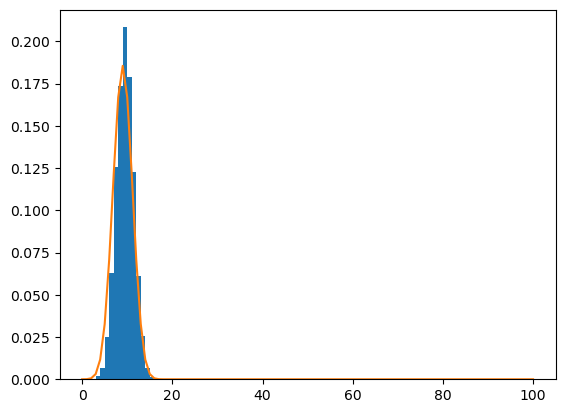

In [62]:
def count_low(N, n, k, replace = False):
    cards = sample_cards(N,n,k, replace = replace)
    flat_cards = np.ndarray.flatten(cards)
    return np.sum(flat_cards <= 50)

num_samp = range(10000)
num_low = np.zeros(len(num_samp))

for i in num_samp:
    num_low[i] = count_low(100, 6, 3)
    
plt.hist(num_low, bins = np.arange(1, 101), density = True)

p = 0.5
n = 18
x = np.arange(0, 101)
y = stats.binom.pmf(x,n,p)
plt.plot(x,y)

__In the plot above, the orange line represents the distribution of a binomial with parameter p = 1/2 and n = 18 while the blue histogram represents proportion of cards out of 1000 games which had values less than or equal to 50. As one can see, these two distributions seem to line up quite well which gives evidence to say that the distribution I generated seems to be similar to that of a binomial.__

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

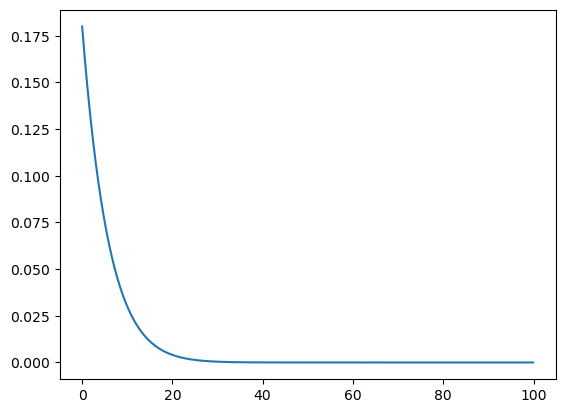

In [63]:
#first order statistic (lowest number) among number of cards in our game which is number of players * number of cards/player
k = 1
n = 18
x = np.arange(0, 100, 0.1)
y = stats.beta.pdf(x,k,n + 1 - k, scale=100)
plt.plot(x,y)

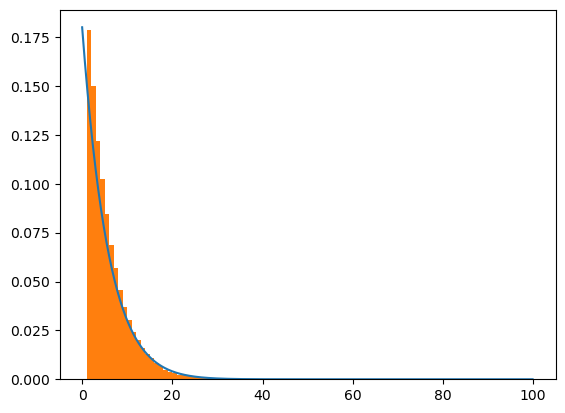

In [64]:
#first order statistic (lowest number) among number of cards in our game which is number of players * number of cards/player
num_samp = 100000
k = 1
n = 18
x = np.arange (0, 100, 0.1)
y = stats.beta.pdf(x,k,n + 1 - k, scale=100)
plt.plot(x,y)

lowest_nums = np.zeros(num_samp)
for i in range(num_samp):
    lowest_nums[i] = int(gen_lowest(100,6,3))

plt.hist(lowest_nums, bins = np.arange(1, 101), density = True)
plt.show()

__We are observing the distribution of the first order statistic from the n*k cards which are drawn from the set of N. As such, I used a Beta(1, 18) distribution to compare since we are working with 3 cards for each of 6 players. As seen above the distribution of the lowest number follows the same general trend as the BEta distribution. For lower values there appear to be very slight overestimates, yet it is likely that this is partly a result of rounding error and variability since we scaled down whole number counts from our histogram to give proportions. This plot gives evidence towards the distribution of the lowest card in THE MIND following a Beta(1, n*k) distribution.__

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

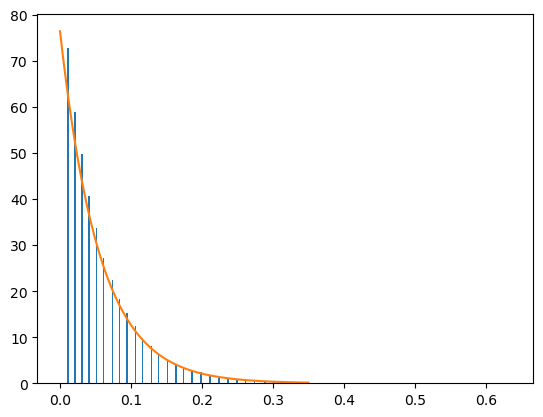

In [65]:
num_samp = 100000
lowest_nums = np.zeros(num_samp)
for i in range(num_samp):
    lowest_nums[i] = gen_lowest(100,6,3)
lowest_nums_transform = -np.log(1 - lowest_nums/100)
plt.hist(lowest_nums_transform, bins = 250,density = True)
x = np.arange(0,0.35,0.0001)
y = 3*(2**(1/2))*stats.expon.pdf(x, scale = 1/18)
plt.plot(x,y)
plt.show()

__Here our our transformed random variable is compared against an exponential distribution with lambda = 18. They appear very similar.__

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

__I will use the binomial approximation to demonstrate the change as N becomes much larger than n*k, which will remain at 3 times 6. Here N = 100__

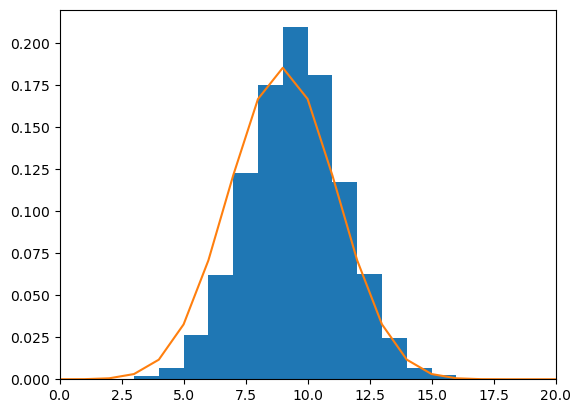

In [76]:
num_samp = range(10000)
num_low = np.zeros(len(num_samp))

for i in num_samp:
    num_low[i] = count_low(100, 6, 3)
    
plt.hist(num_low, bins = np.arange(1, 101), density = True)
plt.xlim(0, 20)
p = 0.5
n = 18
x = np.arange(0, 101)
y = stats.binom.pmf(x,n,p)
plt.plot(x,y)

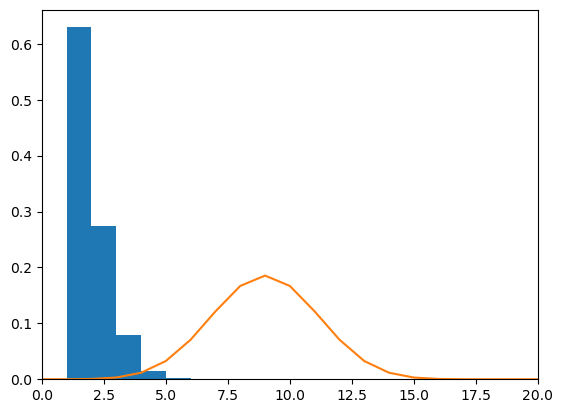

In [86]:
num_samp = range(10000)
num_low = np.zeros(len(num_samp))

for i in num_samp:
    num_low[i] = count_low(1000, 6, 3)
    
plt.hist(num_low, bins = np.arange(1, 101), density = True)
plt.xlim(0, 20)
p = 0.5
n = 18
x = np.arange(0, 101)
y = stats.binom.pmf(x,n,p)
plt.plot(x,y)

__As the number of total cards increases, the distributions begin to separate. Here the orange line is representing a binomial distribtution which samples with replacement. The histogram of lowest cards drawn is coming from a much higher value of N (N=1000) than before.__

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Bryan Huckleberry
- Member No2: 
- Member No3: